# Python Projekt

## EDA

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/creditcard.csv')

df.head()


,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
#from google.colab import drive
#drive.mount('/content/drive')

# Dann den Dateipfad angeben
#import pandas as pd
#df = pd.read_csv('card_transdata.csv')

In [19]:
# Datentyp zurückgeben
type(df)

pandas.core.frame.DataFrame

In [20]:
# Anzahl Zeilen und Spalten zurückgeben
df.shape

(283726, 32)

In [21]:
# Erste 5 Zeilen des DataFrames zurückgeben
df.head()

,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
# Alle Spalten anzeigen lassen
pd.set_option("display.max.columns", None)
df.tail()

,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
283721,283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
283725,283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [23]:
# Spalte und ihre Datentypen anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   283726 non-null  int64  
 1   Time    283726 non-null  float64
 2   V1      283726 non-null  float64
 3   V2      283726 non-null  float64
 4   V3      283726 non-null  float64
 5   V4      283726 non-null  float64
 6   V5      283726 non-null  float64
 7   V6      283726 non-null  float64
 8   V7      283726 non-null  float64
 9   V8      283726 non-null  float64
 10  V9      283726 non-null  float64
 11  V10     283726 non-null  float64
 12  V11     283726 non-null  float64
 13  V12     283726 non-null  float64
 14  V13     283726 non-null  float64
 15  V14     283726 non-null  float64
 16  V15     283726 non-null  float64
 17  V16     283726 non-null  float64
 18  V17     283726 non-null  float64
 19  V18     283726 non-null  float64
 20  V19     283726 non-null  float64
 21  V20     28

In [24]:
# Indexinfos anzeigen
df.index

RangeIndex(start=0, stop=283726, step=1)

In [25]:
# Ein Element anzeigen
df.loc[280]

,280
Index,280.000000
Time,206.000000
V1,-1.499761
V2,1.059588
V3,0.496912
V4,1.006069
V5,-0.672949
V6,-0.490299
V7,1.102433
V8,-0.084854


In [26]:
# Max der einzelnen Spalten
df.max()



,0
Index,283725.000000
Time,172792.000000
V1,2.454930
V2,22.057729
V3,9.382558
V4,16.875344
V5,34.801666
V6,73.301626
V7,120.589494
V8,20.007208


In [27]:
# Min der einzelnen Spalten
df.min()

,0
Index,0.000000
Time,0.000000
V1,-56.407510
V2,-72.715728
V3,-48.325589
V4,-5.683171
V5,-113.743307
V6,-26.160506
V7,-43.557242
V8,-73.216718


In [28]:
# Summe der einzelnen Spalten
df.sum()

,0
Index,4.025008e+10
Time,2.690037e+10
V1,1.678849e+03
V2,-1.173138e+03
V3,4.576839e+02
V4,-8.416186e+02
V5,5.185263e+02
V6,-3.233024e+02
V7,5.109031e+02
V8,-2.424304e+02


In [29]:
# Max der einzelnen Spalten
df.max()

,0
Index,283725.000000
Time,172792.000000
V1,2.454930
V2,22.057729
V3,9.382558
V4,16.875344
V5,34.801666
V6,73.301626
V7,120.589494
V8,20.007208


In [30]:
# Überprüfen von NaN Werte
print(df.isnull().any())


Index     False
Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Fraud     False
dtype: bool


In [31]:
# Alle Spalten finden, in denen alle Daten vorhanden sind
complete_columns = list(df.columns)
print(complete_columns)

['Index', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Fraud']


In [32]:
# NaN Werte zählen
print(df.isnull().sum().to_string())

Index     0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0


In [33]:
# Einzigartige Werte angeben
df.nunique()

,0
Index,283726
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663


In [34]:
# Anzahl doppelte Zeilen prüfen und entfernen
print(f"Anzahl doppelter Zeilen: {df.duplicated().sum()}")
df = df.drop_duplicates()


Anzahl doppelter Zeilen: 0


In [35]:
# Spalte Class in Fraud umbenennen. Diese Spalte zeigt auf, ob es sich um Betrug handelt oder nicht. Diese Zeile zeigt die ungleiche Verteilung von Betrug und Nichtbetrug auf.
df.rename(columns={'Class': 'Fraud'}, inplace=True)
df['Fraud'].value_counts()


,count
Fraud,
0,283253
1,473


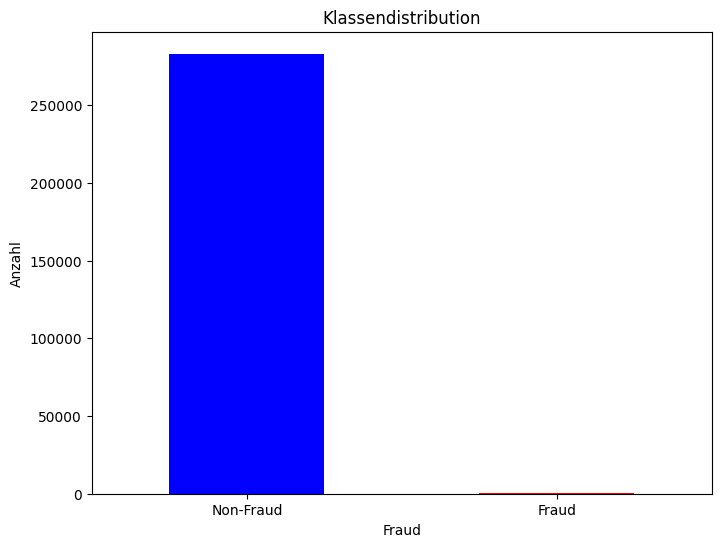

In [36]:
# Klassendistribution aufzeigen
class_counts = df['Fraud'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])

plt.title('Klassendistribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Anzahl')
plt.show()

In [37]:
# Basic Statistik
df.describe()


,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,141862.500000,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,81904.785575,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,70931.250000,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,141862.500000,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,212793.750000,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,283725.000000,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [46]:
# Abspeicherung der Änderung
df.to_csv('/content/creditcard.csv', index=True)

### Key Findings:
- es gibt keine fehlende Elemente im Datenset
- Index geht bis 284807
- Doppelte Zeilen wurden gefunden und gelöscht
- dtypes: float64(30), int64(1)
- Spalte Fraud ist ungleich verteilt. Es hat mehr Datenpunkte ohne Fraud als solche mit.

## Unifying & Transformation

Hinweis: Spalte Time wird nicht in datetime umgewandelt. Die Spalte beschreibt die Anzahl der Sekunden, die zwischen dieser Transaktion und der ersten Transaktion im Datensatz verstrichen sind (Link Quelle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). Es wird keinen Vorteil gesehen.

In [47]:
# Anzeige Datentyp für Spalte Time (Siehe Hinweis oben)
print(df['Time'].dtype)


float64


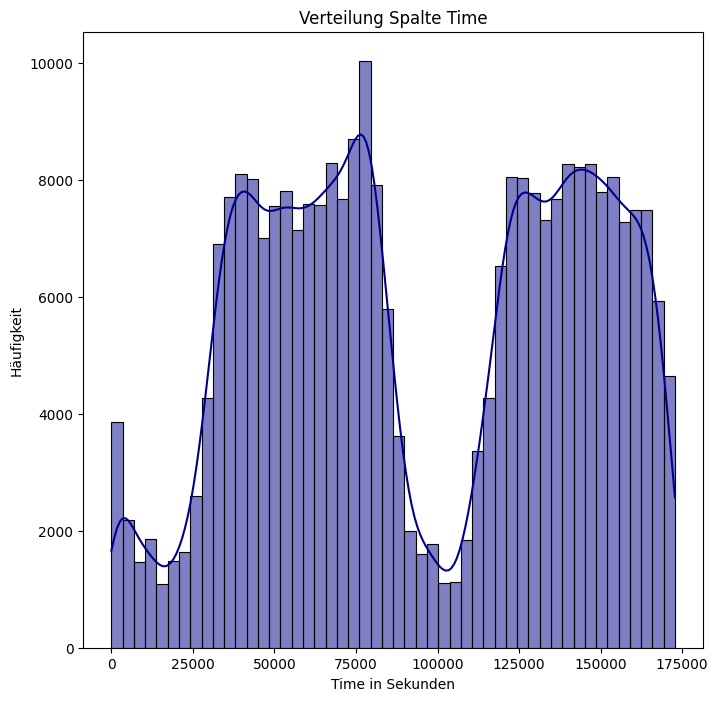

50'000s -> 13.9h
75'000 Sekunden -> 20.8h
100'000 Sekunden -> 27.8h
125'000 Sekunden -> 34.7h
150'000 Sekunden -> 41.7h
175'000 Sekunden -> 48.6h


In [48]:
# Time wird genauer angeschaut: Hier die Verteilung der Spalte Time
plt.figure(figsize=(8, 8))
sns.histplot(df['Time'], bins=50, kde=True, color='darkblue')
plt.title('Verteilung Spalte Time')
plt.xlabel('Time in Sekunden')
plt.ylabel('Häufigkeit')
plt.show()

print("50'000s -> 13.9h")
print("75'000 Sekunden -> 20.8h")
print("100'000 Sekunden -> 27.8h")
print("125'000 Sekunden -> 34.7h")
print("150'000 Sekunden -> 41.7h")
print("175'000 Sekunden -> 48.6h")

In [49]:
# Verwendung von .itertuples() zur Iteration über Zeilen als benannte Tupel (Beispiel)
print("\nIteration mit .itertuples() (Begrenzte Vorschau):")
for row in df[['Time', 'V5', 'V15', 'V28']].itertuples():
    print(row)
    if row.Index >= 4:  # Nach 5 Zeilen abbrechen (Index 0 bis 4)
        break


Iteration mit .itertuples() (Begrenzte Vorschau):
Pandas(Index=0, Time=0.0, V5=-0.338320769942518, V15=1.46817697209427, V28=-0.0210530534538215)
Pandas(Index=1, Time=0.0, V5=0.0600176492822243, V15=0.635558093258208, V28=0.0147241691924927)
Pandas(Index=2, Time=1.0, V5=-0.503198133318193, V15=2.34586494901581, V28=-0.0597518405929204)
Pandas(Index=3, Time=1.0, V5=-0.0103088796030823, V15=-0.631418117709045, V28=0.0614576285006353)
Pandas(Index=4, Time=2.0, V5=-0.407193377311653, V15=0.175121130008994, V28=0.215153147499206)


In [50]:
# Erstellen von Listen aus spezifischen Daten im DataFrame
# Beispiel: Extrahieren der Werte für 'Time' und 'V5' in separaten Listen
if 'Time' in df.columns and 'V5' in df.columns:
    distance_values = df['Time'].tolist()
    fraud_labels = df['V5'].tolist()
    print("\nBeispiel-Distanzwerte:", distance_values[:5])
    print("Beispiel-Betrugsklassifikationen:", fraud_labels[:5])



Beispiel-Distanzwerte: [0.0, 0.0, 1.0, 1.0, 2.0]
Beispiel-Betrugsklassifikationen: [-0.338320769942518, 0.0600176492822243, -0.503198133318193, -0.0103088796030823, -0.407193377311653]


In [51]:
# Iteration über DataFrame-Spalten und -Zeilen

# Spalten iterieren und ausgeben
print("\nIteration über die Spalten:")
for col_label, col in df.items():
    print(f"Spalte: {col_label}")
    print(f"Daten:\n{col.head()}")
    print('-' * 40)

# Zeilen iterieren und ausgeben (nur die ersten 5 Zeilen zur Übersicht)
print("\nIteration über die ersten 5 Zeilen:")
for row_label, row in df.head(5).iterrows():
    print(f"Zeile: {row_label}")
    print(f"Daten:\n{row}")
    print('-' * 40)


Iteration über die Spalten:
Spalte: Time
Daten:
Index
0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64
----------------------------------------
Spalte: V1
Daten:
Index
0   -1.359807
1    1.191857
2   -1.358354
3   -0.966272
4   -1.158233
Name: V1, dtype: float64
----------------------------------------
Spalte: V2
Daten:
Index
0   -0.072781
1    0.266151
2   -1.340163
3   -0.185226
4    0.877737
Name: V2, dtype: float64
----------------------------------------
Spalte: V3
Daten:
Index
0    2.536347
1    0.166480
2    1.773209
3    1.792993
4    1.548718
Name: V3, dtype: float64
----------------------------------------
Spalte: V4
Daten:
Index
0    1.378155
1    0.448154
2    0.379780
3   -0.863291
4    0.403034
Name: V4, dtype: float64
----------------------------------------
Spalte: V5
Daten:
Index
0   -0.338321
1    0.060018
2   -0.503198
3   -0.010309
4   -0.407193
Name: V5, dtype: float64
----------------------------------------
Spalte: V6
Daten:
Index
0    0.4

## Cleaning

In [52]:
# Spalte Index hinzufügen. Es wird also nicht die automatisch generierte Indexspalte verwendet
df['Index'] = range(len(df))
df.set_index('Index', inplace=True)

In [53]:
# Überprüfen, ob es geklappt hat
print(df.head())
df.index
df.loc[2800]

       Time        V1        V2        V3        V4        V5        V6  \
Index                                                                     
0       0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

             V7        V8        V9       V10       V11       V12       V13  \
Index                                                                         
0      0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1     -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2      0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3      0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   


,2800
Time,2399.000000
V1,-0.569365
V2,1.240862
V3,1.170854
V4,0.016219
V5,-0.096222
V6,-1.017994
V7,0.652285
V8,-0.016928
V9,-0.079993


In [55]:
# Abspeicherung der Änderung
df.to_csv('/content/creditcard.csv', index=True)

## Analysis & Validation

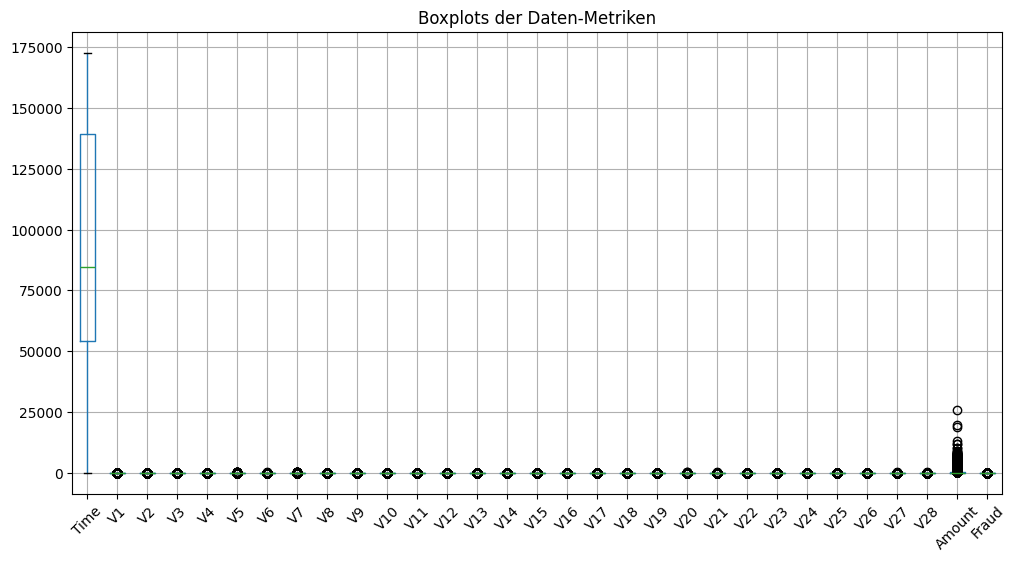

In [56]:
# Erstellung von Boxplots zur Überprüfung von Ausreissern
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['float64', 'int64']).boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots der Daten-Metriken')
plt.show()

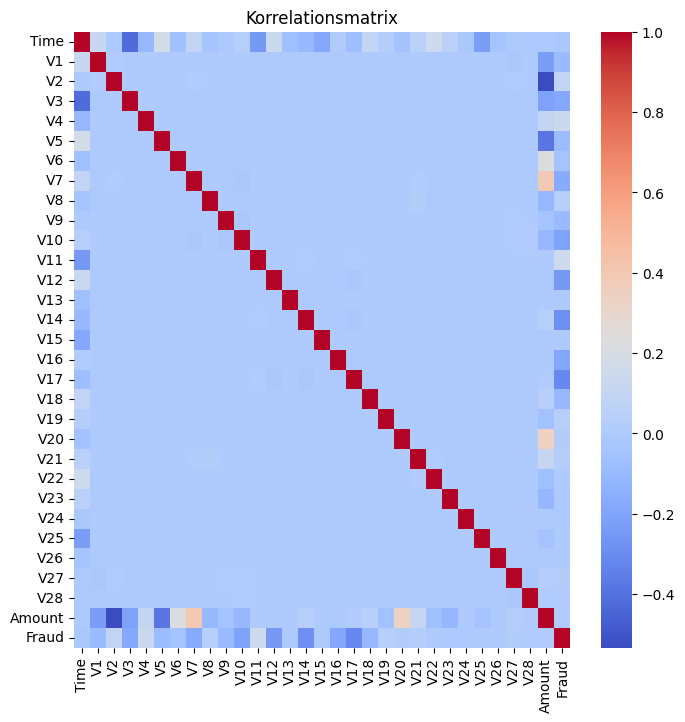

In [57]:
# Korrelationsmatrix erstellen

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()



In [58]:
# Die drei Typen der Korrelation anwenden
from scipy import stats

# Funktion für die Berechnung der Korrelationen
def print_correlations(x, y, title):
    pearson_r, _ = stats.pearsonr(x, y)
    spearman_rho, _ = stats.spearmanr(x, y)
    kendall_tau, _ = stats.kendalltau(x, y)

    print(f"\n Korrelation für: {title}:")
    print(f"Pearson (r)   = {pearson_r:.3f}")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")
    print(f"Kendall (τ)   = {kendall_tau:.3f}")

# Zielvariable definieren
target = 'Fraud'

# Nur nummerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Berechnen Korrelation zwischen Fraud und allen anderen nummerischen Spalten
for col in numeric_columns:
    if col != target:  # Zielvariable nicht mit sich selbst vergleichen
        print_correlations(df[target], df[col], f"{target} vs {col}")




 Korrelation für: Fraud vs Time:
Pearson (r)   = -0.012
Spearman (ρ)  = -0.012
Kendall (τ)   = -0.010

 Korrelation für: Fraud vs V1:
Pearson (r)   = -0.094
Spearman (ρ)  = -0.041
Kendall (τ)   = -0.033

 Korrelation für: Fraud vs V2:
Pearson (r)   = 0.085
Spearman (ρ)  = 0.049
Kendall (τ)   = 0.040

 Korrelation für: Fraud vs V3:
Pearson (r)   = -0.182
Spearman (ρ)  = -0.058
Kendall (τ)   = -0.047

 Korrelation für: Fraud vs V4:
Pearson (r)   = 0.129
Spearman (ρ)  = 0.062
Kendall (τ)   = 0.050

 Korrelation für: Fraud vs V5:
Pearson (r)   = -0.088
Spearman (ρ)  = -0.028
Kendall (τ)   = -0.023

 Korrelation für: Fraud vs V6:
Pearson (r)   = -0.044
Spearman (ρ)  = -0.038
Kendall (τ)   = -0.031

 Korrelation für: Fraud vs V7:
Pearson (r)   = -0.172
Spearman (ρ)  = -0.047
Kendall (τ)   = -0.038

 Korrelation für: Fraud vs V8:
Pearson (r)   = 0.033
Spearman (ρ)  = 0.023
Kendall (τ)   = 0.019

 Korrelation für: Fraud vs V9:
Pearson (r)   = -0.094
Spearman (ρ)  = -0.048
Kendall (τ)   = -0.0

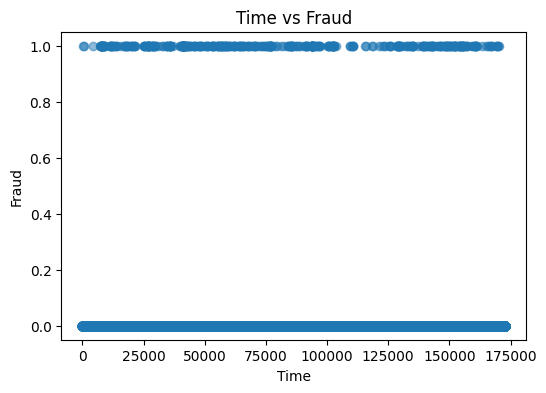

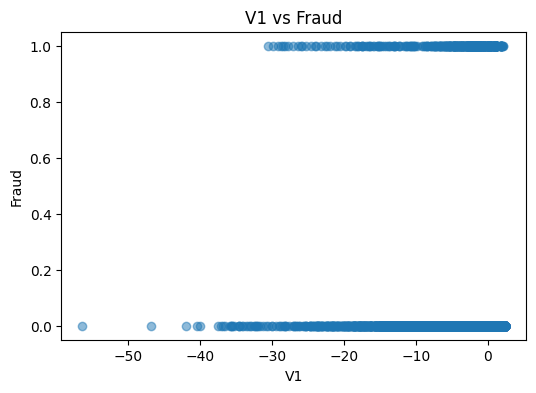

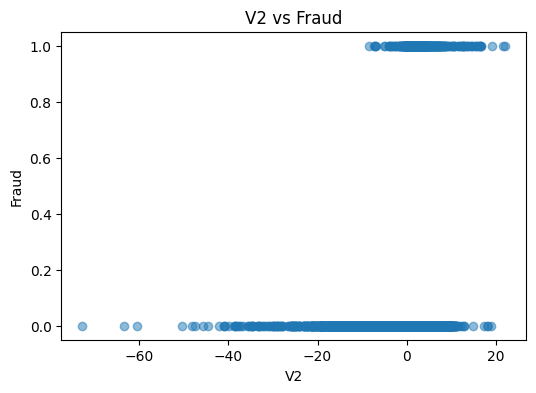

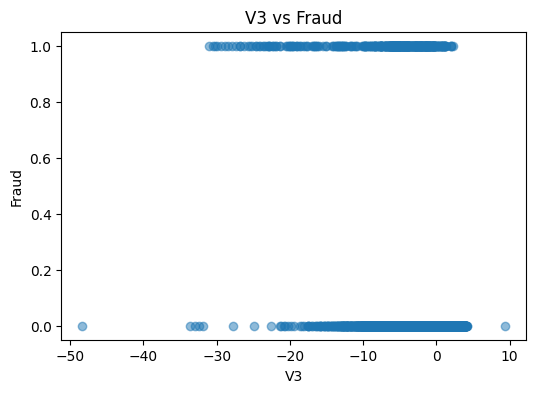

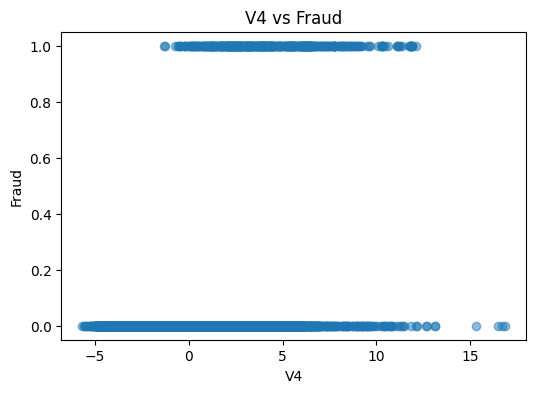

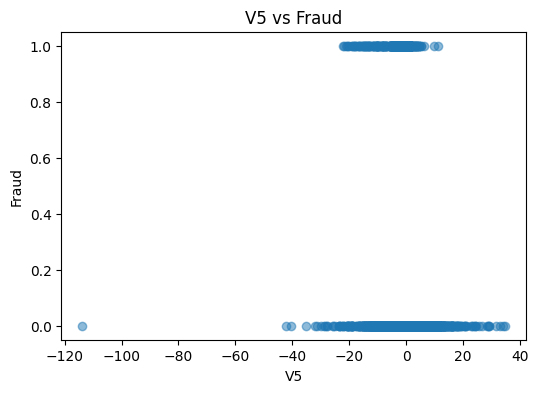

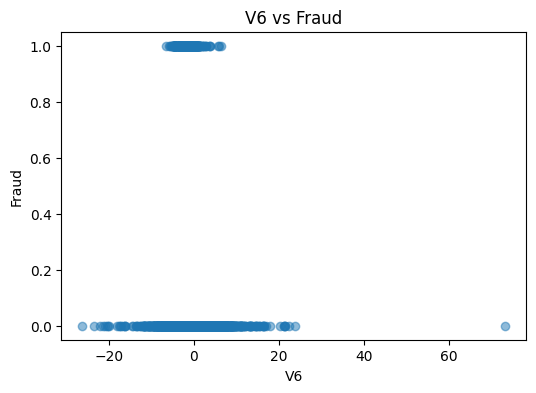

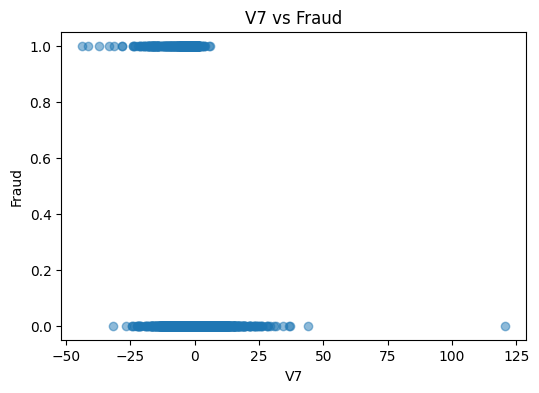

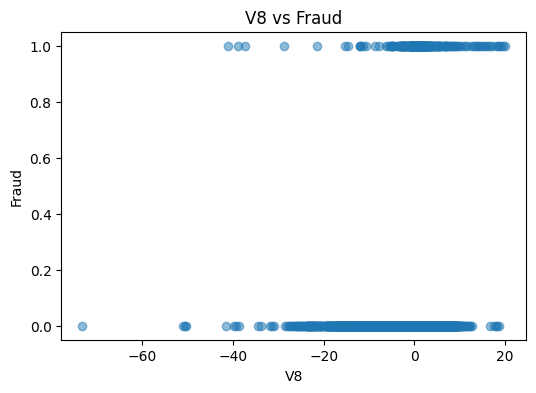

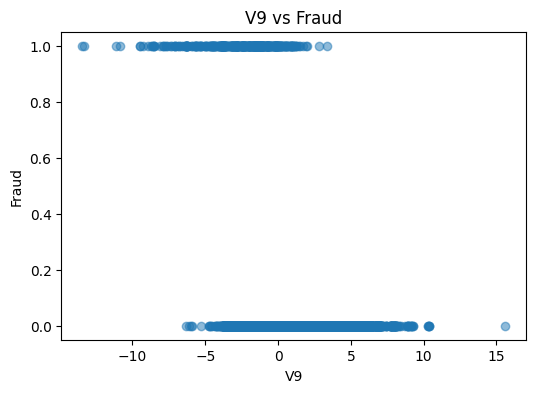

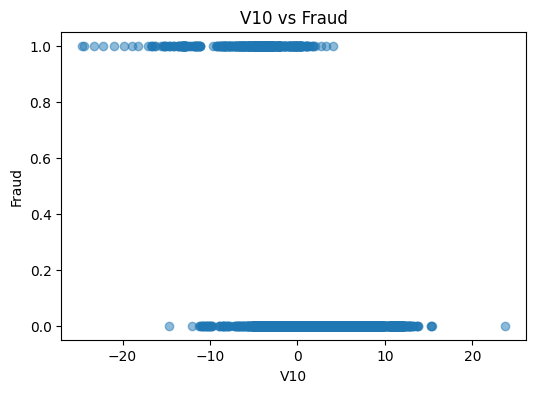

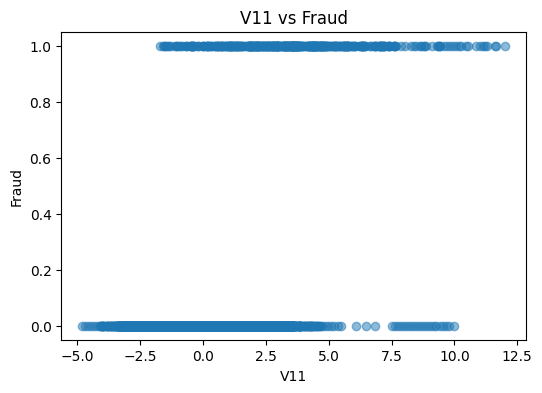

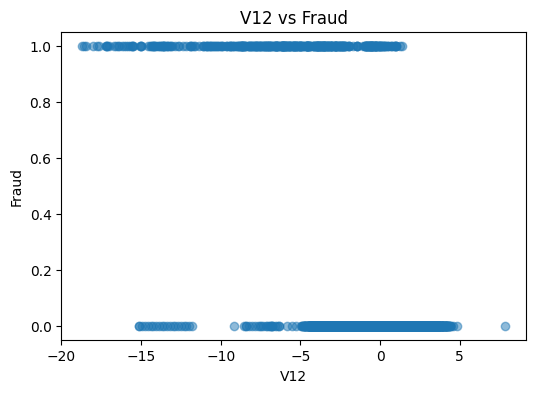

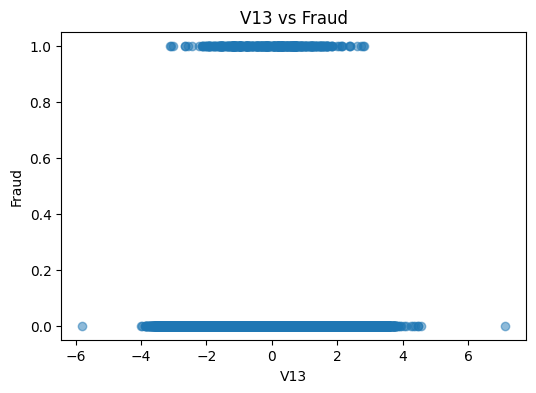

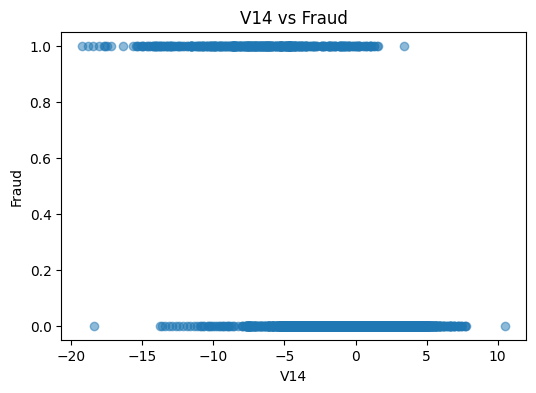

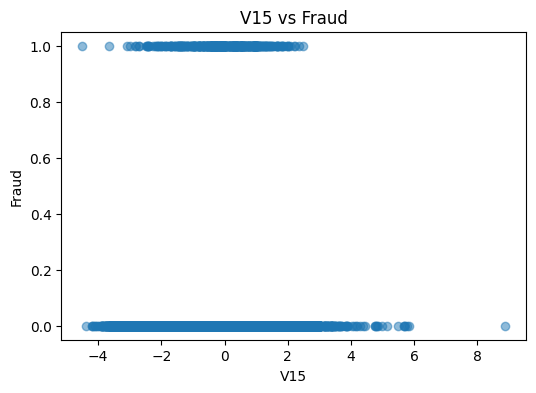

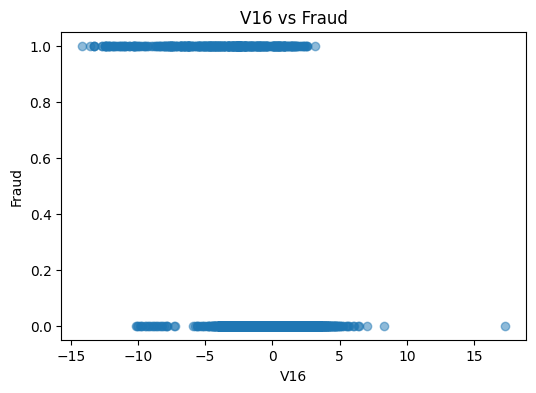

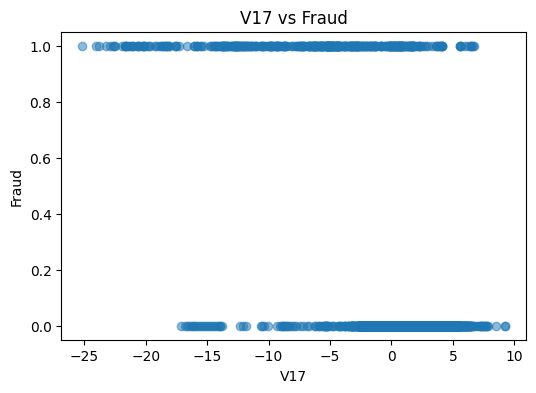

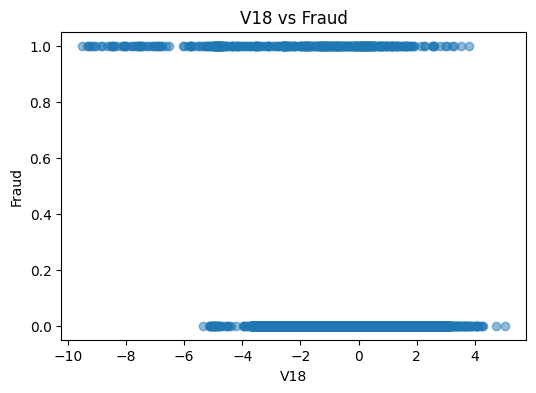

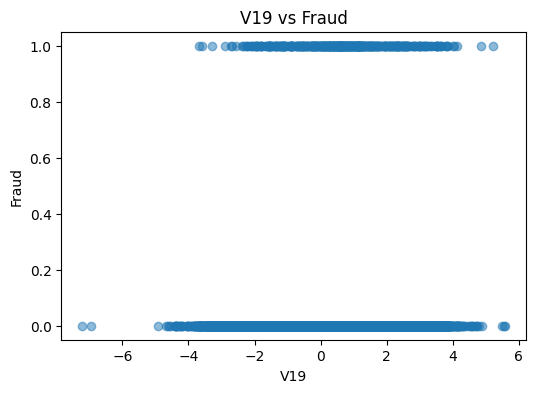

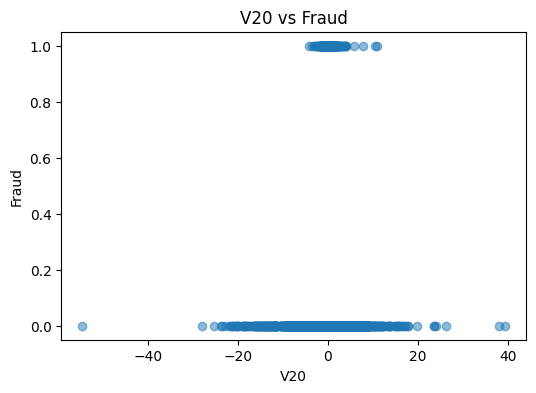

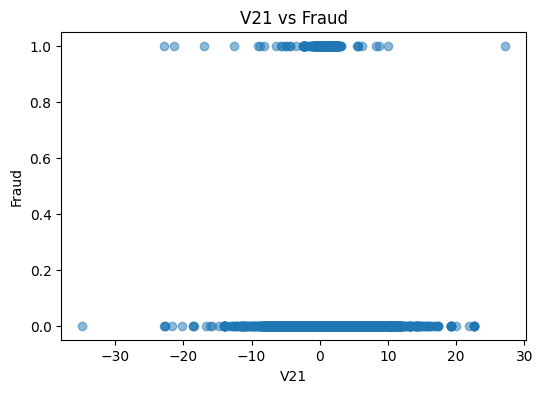

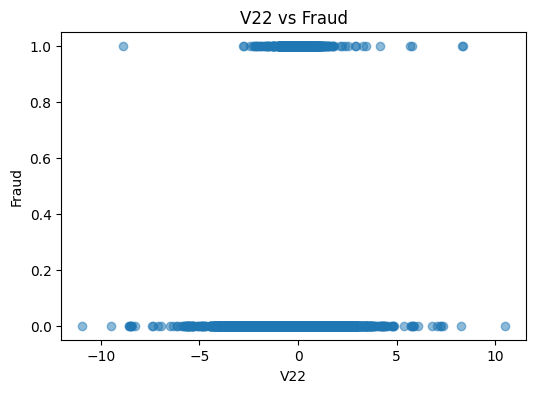

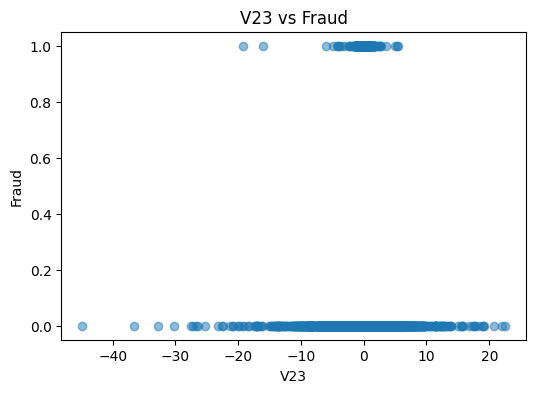

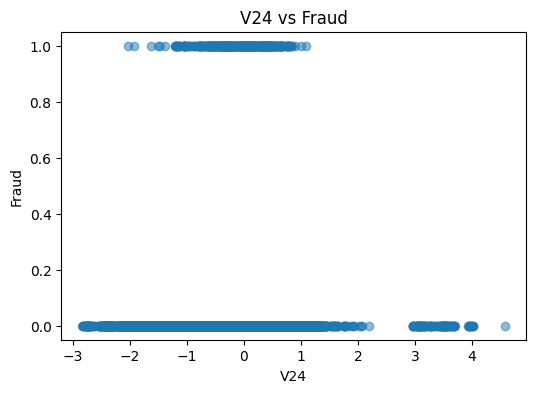

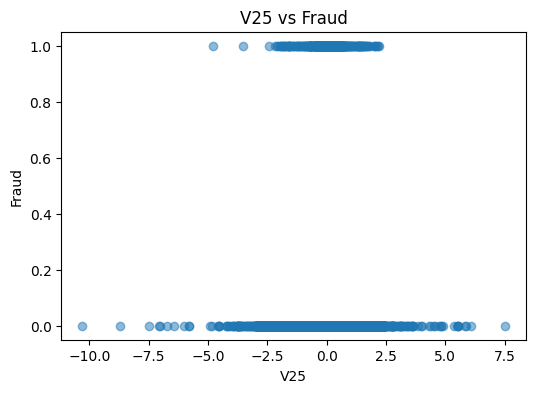

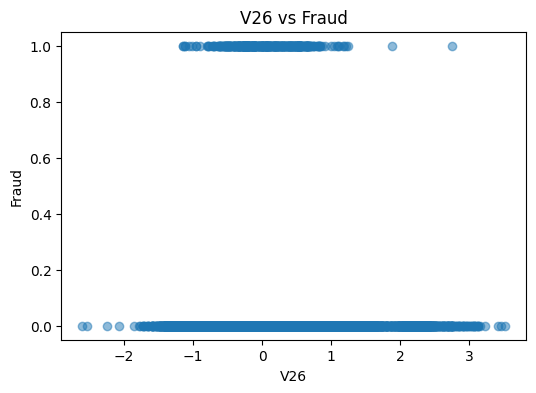

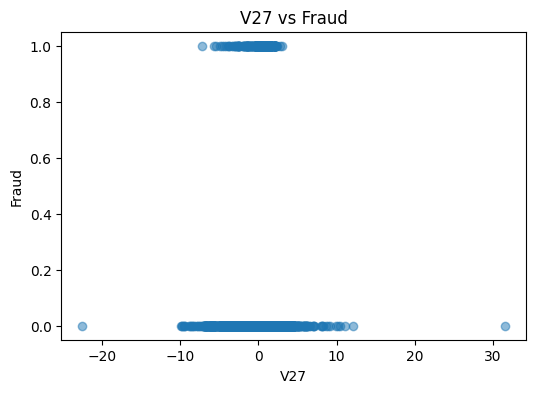

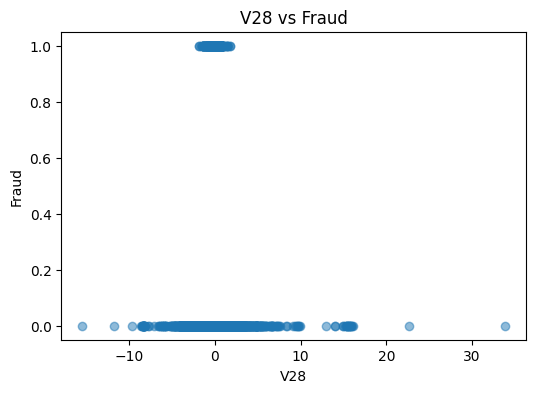

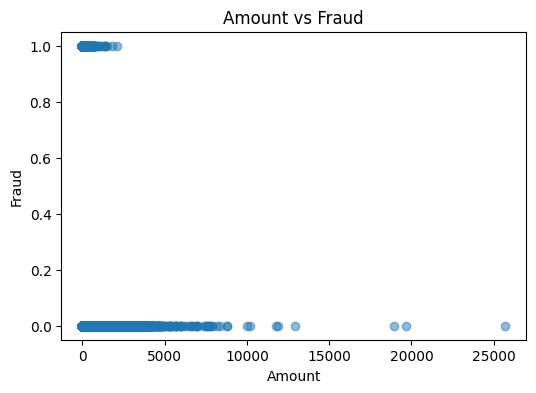

In [59]:
# Bestimmung Linerae Beziehung zwischen Fraud und andere Variablen
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'Fraud':
        plt.figure(figsize=(6, 4))
        plt.scatter(df[column], df['Fraud'], alpha=0.5)
        plt.title(f'{column} vs Fraud')
        plt.xlabel(column)
        plt.ylabel('Fraud')
        plt.show()

Die Grafiken zeigen auf, dass die Beziehung zwischen Fraud und den anderen Variablen nicht linear ist. Daher ist die Berechnungsmethode Spearman am geeignetesten. Sie ist misst die monotone Beziehung zwischen zwei Variablen und ist weniger sensitiv für Outliers. In unserem Datenset hat vorallem Variable Amount Outliers.

In [60]:
# Berechnung Korrelation nach Spearman

# Funktion für die Berechnung der Korrelationen
def correlation_spearman(x, y, title):
    spearman_rho, _ = stats.spearmanr(x, y)

    print(f"Korrelation für: {title}:")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")

# Zielvariable definieren
target = 'Fraud'

# Nur nummerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Berechnen Korrelation zwischen Fraud und allen anderen nummerischen Spalten
for col in numeric_columns:
    if col != target:  # Zielvariable nicht mit sich selbst vergleichen
        correlation_spearman(df[target], df[col], f"{target} vs {col}")

Korrelation für: Fraud vs Time:
Spearman (ρ)  = -0.012
Korrelation für: Fraud vs V1:
Spearman (ρ)  = -0.041
Korrelation für: Fraud vs V2:
Spearman (ρ)  = 0.049
Korrelation für: Fraud vs V3:
Spearman (ρ)  = -0.058
Korrelation für: Fraud vs V4:
Spearman (ρ)  = 0.062
Korrelation für: Fraud vs V5:
Spearman (ρ)  = -0.028
Korrelation für: Fraud vs V6:
Spearman (ρ)  = -0.038
Korrelation für: Fraud vs V7:
Spearman (ρ)  = -0.047
Korrelation für: Fraud vs V8:
Spearman (ρ)  = 0.023
Korrelation für: Fraud vs V9:
Spearman (ρ)  = -0.048
Korrelation für: Fraud vs V10:
Spearman (ρ)  = -0.058
Korrelation für: Fraud vs V11:
Spearman (ρ)  = 0.059
Korrelation für: Fraud vs V12:
Spearman (ρ)  = -0.061
Korrelation für: Fraud vs V13:
Spearman (ρ)  = -0.003
Korrelation für: Fraud vs V14:
Spearman (ρ)  = -0.063
Korrelation für: Fraud vs V15:
Spearman (ρ)  = -0.002
Korrelation für: Fraud vs V16:
Spearman (ρ)  = -0.048
Korrelation für: Fraud vs V17:
Spearman (ρ)  = -0.042
Korrelation für: Fraud vs V18:
Spearman 

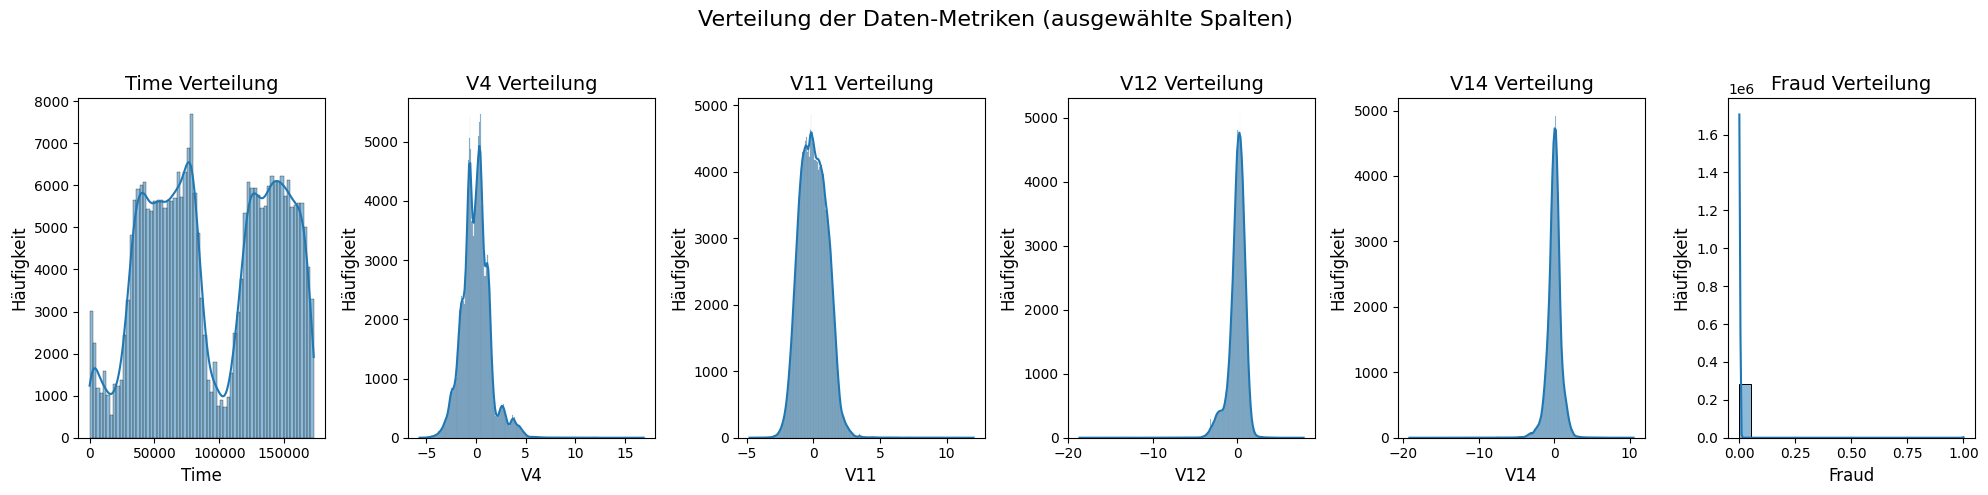

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten
selected_columns = ['Time', 'V4', 'V11', 'V12', 'V14', 'Fraud']

# Erstellung eines Subplots mit 1 Zeile und der Anzahl der ausgewählten Spalten
fig, axes = plt.subplots(1, len(selected_columns), figsize=(20, 5))
fig.suptitle('Verteilung der Daten-Metriken (ausgewählte Spalten)', fontsize=16)

# Erstelle ein Verteilungsdiagramm für jede numerische Spalte
for idx, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, ax=axes[idx], kde=True)
    axes[idx].set_title(f'{column} Verteilung', fontsize=14)
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_ylabel('Häufigkeit', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


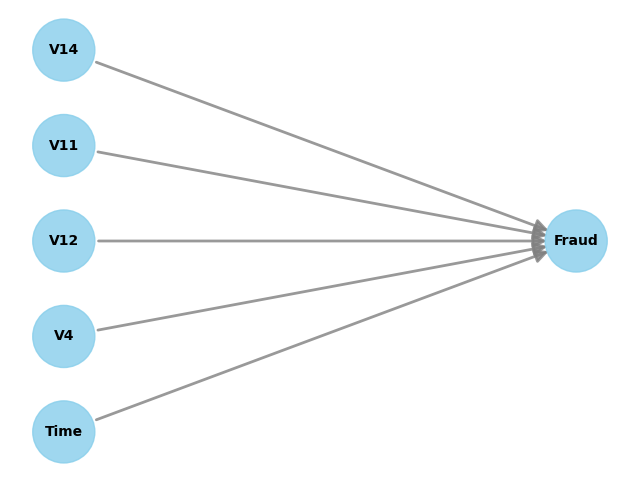

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Fraud])
d[Time  V₄  V₁₁  V₁₂  V₁₄]          
Estimand assumption 1, Unconfoundedness: If U→{Time,V4,V11,V12,V14} and U→Fraud then P(Fraud|Time,V4,V11,V12,V14,,U) = P(Fraud|Time,V4,V11,V12,V14,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Kausale Wirkung (Causal Effect): -0.012738203926484767


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_mode

Refute: Use a Placebo Treatment
Estimated effect:-0.012738203926484767
New effect:0.0
p value:1.0



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [62]:
# Kausalität zwischen den Variablen untersuchen

%pip install dowhy

import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd
import networkx as nx

# Definition des kausalen Modells
model = CausalModel(
    data=df,
    treatment=['Time', 'V4', 'V11', 'V12', 'V14'],
    outcome="Fraud",
    graph="""
        digraph {
            Time -> Fraud;
            V4 -> Fraud;
            V11 -> Fraud;
            V12 -> Fraud;
            V14 -> Fraud;
        }
    """
)

# Visualisierung des Kausalgraphen
model.view_model()

# Identifizieren der Kausalwirkung
identified_estimand = model.identify_effect()
print(identified_estimand)


# Schätzung der Kausalwirkung
causal_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Ergebnisse anzeigen
print("Kausale Wirkung (Causal Effect):", causal_effect.value)

# Validierung der Ergebnisse
refutation = model.refute_estimate(
    identified_estimand,
    causal_effect,
    method_name="placebo_treatment_refuter"
)
print(refutation)

### Key Findings:
Korrelation nach Spearman: allgemein eher schwache Korrelation zwischen Fraud und anderen Variablen
- Sehr niedrige Korrelationen (|ρ| < 0.05): Time (-0.012), V1 (-0.041), V2 (0.049), V5 (-0.028), V6 (-0.038), V7 (-0.047), V8 (0.023), V9 (-0.048), V10 (-0.058), V13 (-0.003), V15 (-0.002), V16 (-0.048), V17 (-0.042), V18 (-0.033), V19 (0.022), V20 (0.022), V22 (0.002), V23 (-0.006), V24 (-0.009), V25 (0.005), V26 (0.005), V27 (0.029), V28 (0.021), Amount (-0.008)
- Leicht höhere Korrelationen (|ρ| zwischen 0.05 und 0.1): V4 (0.062), V11 (0.059), V12 (-0.061), V14 (-0.063)


Outliers: nur Amount hat Outliers

Verteilung im Datensatz (nur ausgewählte Variablen angeschaut): Die Variablen V4, V11, V12 und V14 zeigen alle eine symmetrische Verteilung mit starken Peaks um ihren jeweiligen Mittelwert.

Kausalität: Es besteht keine Beziehung zwischen den erklährenden Variablen untereinander, aber die erklährenden VariablenTime, V4, V11, V12 und V14 sind direkt mit Fraud verbunden.

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


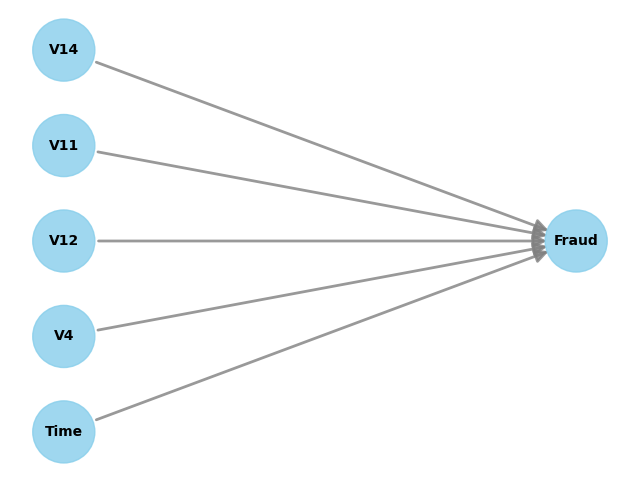

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Fraud])
d[Time  V₄  V₁₁  V₁₂  V₁₄]          
Estimand assumption 1, Unconfoundedness: If U→{Time,V4,V11,V12,V14} and U→Fraud then P(Fraud|Time,V4,V11,V12,V14,,U) = P(Fraud|Time,V4,V11,V12,V14,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Kausale Wirkung (Causal Effect): -0.012738203926484767


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Refute: Use a Placebo Treatment
Estimated effect:-0.012738203926484767
New effect:0.0
p value:1.0



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [63]:
# Kausalität zwischen den Variablen untersuchen

%pip install dowhy

import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd
import networkx as nx

# Definition des kausalen Modells
model = CausalModel(
    data=df,
    treatment=['Time', 'V4', 'V11', 'V12', 'V14'],
    outcome="Fraud",
    graph="""
        digraph {
            Time -> Fraud;
            V4 -> Fraud;
            V11 -> Fraud;
            V12 -> Fraud;
            V14 -> Fraud;
        }
    """
)

# Visualisierung des Kausalgraphen
model.view_model()

# Identifizieren der Kausalwirkung
identified_estimand = model.identify_effect()
print(identified_estimand)


# Schätzung der Kausalwirkung
causal_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Ergebnisse anzeigen
print("Kausale Wirkung (Causal Effect):", causal_effect.value)

# Validierung der Ergebnisse
refutation = model.refute_estimate(
    identified_estimand,
    causal_effect,
    method_name="placebo_treatment_refuter"
)
print(refutation)

# **Model Linear Regression**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Datenaufteilung: Features und Zielvariable
X = df.drop(columns=['Fraud'])  # Entferne irrelevante Spalten
y = df['Fraud']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE anwenden (class imbalance)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistische Regression initialisieren
logreg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Modell trainieren
logreg.fit(X_train_resampled, y_train_resampled)

# Vorhersagen
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für Betrug

# Ergebnisse evaluieren
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.08      0.89      0.14       142

    accuracy                           0.98     85118
   macro avg       0.54      0.94      0.57     85118
weighted avg       1.00      0.98      0.99     85118


ROC AUC Score: 0.96912951892299


# Performance

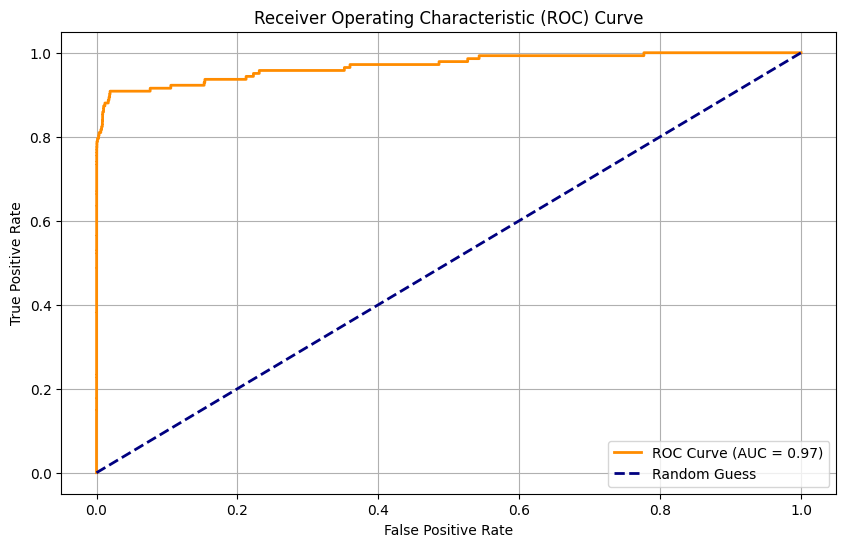

Key Metrics:
Accuracy: 0.98
Precision: 0.08
Recall: 0.89
F1-Score: 0.14

Confusion Matrix:
 [[83423  1553]
 [   15   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.08      0.89      0.14       142

    accuracy                           0.98     85118
   macro avg       0.54      0.94      0.57     85118
weighted avg       1.00      0.98      0.99     85118



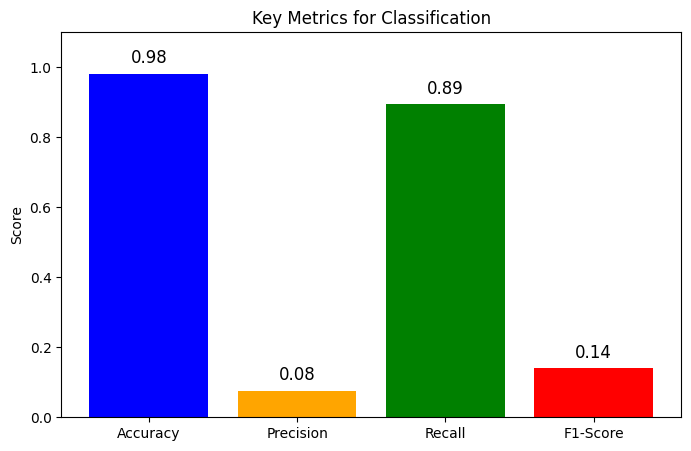

In [70]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Berechnung der ROC-Kurve und AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot: ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Display Confusion Matrix, Classification Report, and Key Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# KPI Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Results
print("Key Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# KPI Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Key Metrics for Classification')
plt.ylim(0, 1.1)
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.03, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


Decision Tree Model

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Datenaufteilung: Features und Zielvariable
X = df.drop(columns=['Fraud'])  # Entferne irrelevante Spalten
y = df['Fraud']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE anwenden (class imbalance)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Decision Tree Classifier initialisieren
dt_classifier = DecisionTreeClassifier(random_state=42)

# Modell trainieren
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Vorhersagen
y_pred = dt_classifier.predict(X_test)
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für Betrug

# Ergebnisse evaluieren
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.45      0.72      0.55       142

    accuracy                           1.00     85118
   macro avg       0.72      0.86      0.77     85118
weighted avg       1.00      1.00      1.00     85118


ROC AUC Score: 0.8584076597601046


Decision Tree Performance

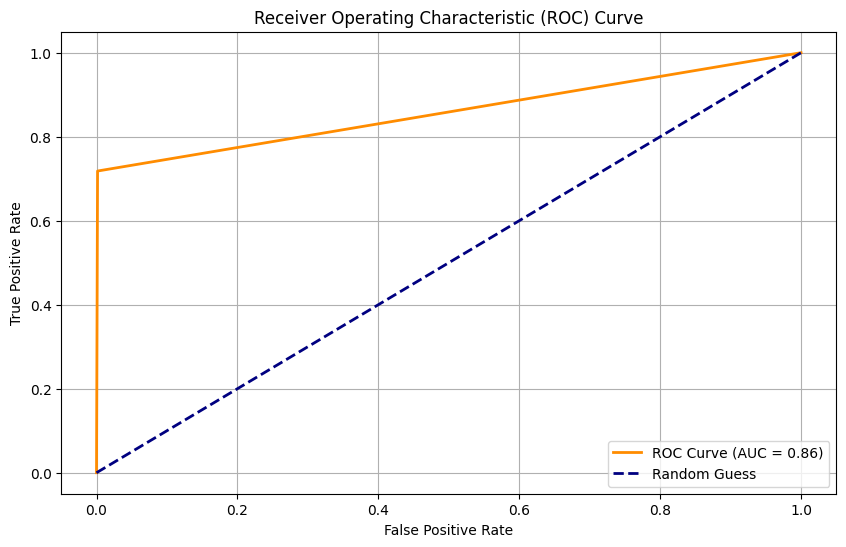

Key Metrics:
Accuracy: 1.00
Precision: 0.45
Recall: 0.72
F1-Score: 0.55

Confusion Matrix:
 [[84849   127]
 [   40   102]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.45      0.72      0.55       142

    accuracy                           1.00     85118
   macro avg       0.72      0.86      0.77     85118
weighted avg       1.00      1.00      1.00     85118



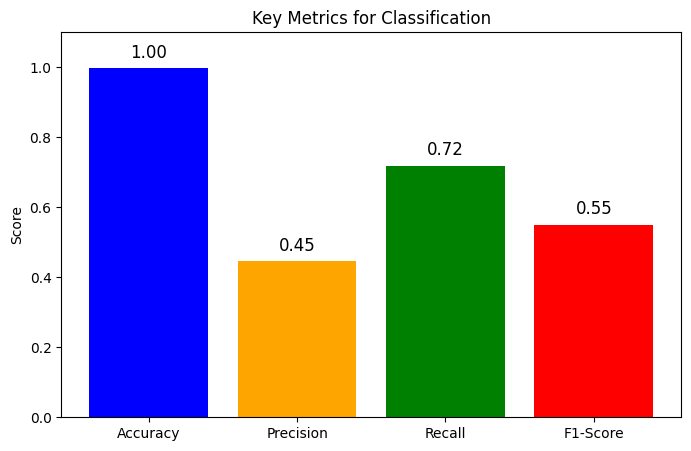

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Berechnung der ROC-Kurve und AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot: ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# KPI Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Results
print("Key Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# KPI Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Key Metrics for Classification')
plt.ylim(0, 1.1)
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.03, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Datenaufteilung: Features und Zielvariable
X = df.drop(columns=['Fraud'])  # Entferne irrelevante Spalten
y = df['Fraud']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE anwenden (class imbalance)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest Classifier initialisieren
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# Modell trainieren
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Vorhersagen
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für Betrug

# Ergebnisse evaluieren
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.20      0.84      0.33       142

    accuracy                           0.99     85118
   macro avg       0.60      0.92      0.66     85118
weighted avg       1.00      0.99      1.00     85118


ROC AUC Score: 0.9724389454785576


Random Forest Performance

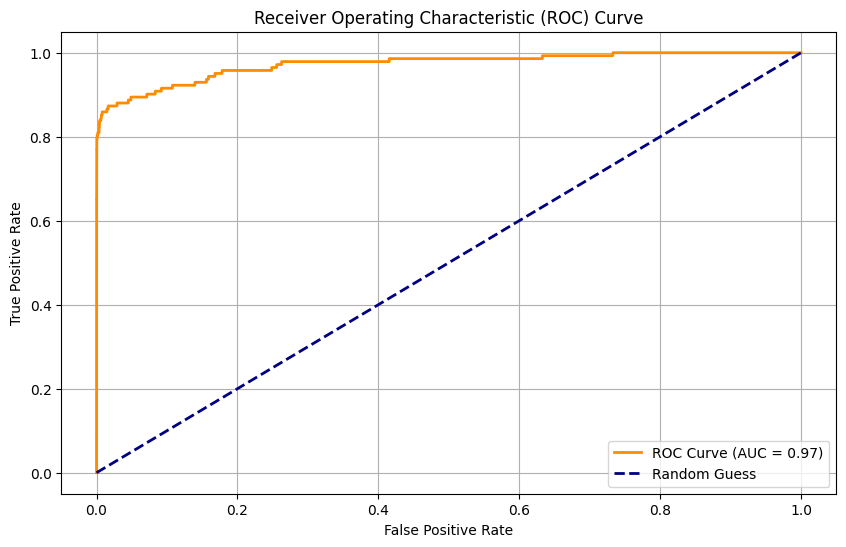

Key Metrics:
Accuracy: 0.99
Precision: 0.20
Recall: 0.84
F1-Score: 0.33

Confusion Matrix:
 [[84513   463]
 [   23   119]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.20      0.84      0.33       142

    accuracy                           0.99     85118
   macro avg       0.60      0.92      0.66     85118
weighted avg       1.00      0.99      1.00     85118



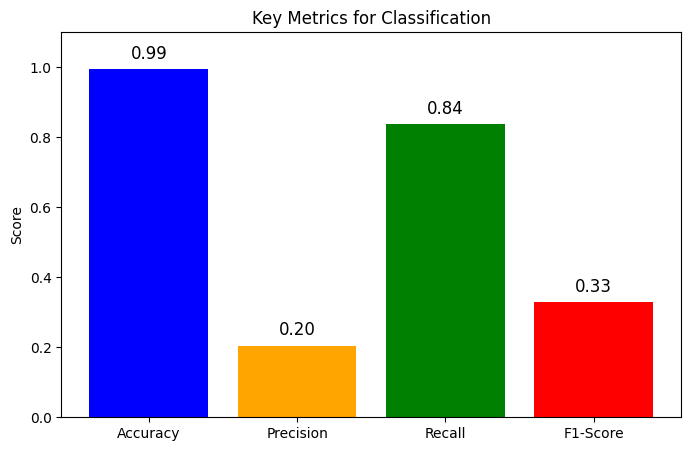

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Berechnung der ROC-Kurve und AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot: ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# KPI Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Results
print("Key Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# KPI Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Key Metrics for Classification')
plt.ylim(0, 1.1)
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.03, f"{v:.2f}", ha='center', fontsize=12)
plt.show()
